# Linear Regression

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# use this for traditional OLS regression
import statsmodels.api as sm

## Load Data

In [ ]:
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/JohnTheQuantYoutube/Bootcamp/refs/heads/main/Week1/diabetes_data.csv')
transformed_data = pd.read_csv('transformed_diabetes_data.csv').drop('Unnamed: 0', axis=1)

In [ ]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
transformed_data.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,age_buckets_thirties,age_buckets_40plus,outcome
0,0.763721,0.852119,-0.032998,0.671091,0.416780,0.269082,0.761343,1.362563,0,1,1.0
1,-0.708481,-1.207994,-0.527280,0.073180,-1.296968,-0.831240,-0.141270,0.113269,1,0,0.0
2,1.148595,1.996626,-0.692041,-0.271203,0.371574,-1.455115,0.869179,0.217510,1,0,1.0
3,-0.708481,-1.077194,-0.527280,-0.590521,-0.557812,-0.572858,-1.296906,-1.494139,0,0,0.0
4,-1.724150,0.492416,-2.669169,0.671091,0.406599,1.441855,2.775306,0.315239,1,0,1.0


# Research and Hypotheses

## What is Research?

At its heart, Research just means "finding the answer to a question". That's what data science is really all about. Remember in the first video in Week 1, we said that data scientists create value by generating information? That means data scientists do research. Because that's what research is: Generating new information. There are a lot of ways to generate new information, but in this bootcamp, we are going to focus on a very basic form of quantitative research: hypothesis testing with linear regression. This is the most common form of quantitative research. It shows up all the time. Once you learn how to interpret it, you'll start recognizing it all over the place.

## Research Questions

Just a second ago, we said that research means "finding the answer to a question". Obviously, we need a question to answer. That's the research question. There are a few important things to keep in mind when formulating research questions:

1. You research question **MUST** be objective. You can't use words like "better".
   * Example
         * BAD - Is lower BMI better for health?
         * GOOD - Does having a lower BMI decrease the probability of being diagnosed with diabetes?
2. Your research question **MUST** be specific. You have to be careful in choosing your words.
   * Example
       * BAD - Are fatter people more likely to have diabetes?
       * GOOD - Is higher BMI statistically associated with a higher probability of being diagnosed with diabetes?
3. Your research question **MUST** be measurable. If you can't measure it, then you cannot research it.
    * Example
          * BAD - How many people actually have diabetes?
          * GOOD - What proportion of the population is diagnosed with diabetes?
    * This example is tough because in common language, the two sentences might mean almost exactly the same thing. But we have to recognize that we don't *actually* know how many people *have* diabetes, we only know how many people are *diagnosed* with diabetes. We have to assume that there are a lot of people who have diabetes but go undiagnosed, so we can NEVER answer Question #1.

There are other important things to keep in mind when forming research questions, but to my mind the rest of them are fairly intuitive. For example: Your research question must be relevant. It's just common sense that your question needs to be applicable to the problem you're trying to solve, right?

Here's a link to more information on writing good research questions.
https://www.proprofssurvey.com/blog/quantitative-research-questions/

## Hypotheses

Once you have a good research question, you can start writing hypotheses. You might remember learning about hypotheses in like middle school science or something. Here, our hypothesis will have to take a specific form. And we will have two hypotheses. The first one, called the Null Hypothesis, is the hypothesis you will actually test, and the second one, the Alternative Hypothesis, MUST be true if the Null Hypothesis is false. Let's just explain how we write those hypothesis and that should explain what they mean, too.

For this, assume our research question is the simple:
**Does BMI have a significant effect on the probability of being diagnosed with diabetes?**

### Null Hypothesis

When I'm writing hypotheses, I try to think of the Null Hypothesis as: *the thing you'd like to prove wrong*. People who teach this stuff at universities might be pulling their hair out right now, but I do find that simplification helpful, and so long as you understand the rest of what we're about to say, then it's not a harmful simplification. It doesn't always work, but when it does it makes writing hypotheses super easy.

So, for our example research question, what do I want to prove wrong? The sentence I'd like to prove wrong is: "BMI has no effect on the probability of being diagnosed with diabetes." So that's our null hypothesis.

When performing the hypothesis test, you *assume the null hypothesis is true, then find the probability of getting your data IF the null hypothesis is true*. If it would be really unlikely to get the dataset you got, that is evidence that the null hypothesis *may not* be true. Notice how carefully I'm choosing words here. We can never really "prove" that the null hypothesis isn't true, but we can find evidence that it probably isn't true. When we find that evidence, when the probability of getting our dataset is really low, we say that we "reject the null hypothesis". That's a bit of statistician lingo, but what it means is that we have found evidence that the null hypothesis is unlikely to be true.

### Alternative Hypothesis

The alternative hypothesis is whatever MUST BE TRUE if the Null Hypothesis is False. Let's look at our example Null Hypothesis: "BMI has no effect on the probability of being diagnosed with diabetes."

If that is False, what MUST be true?
"BMI has some effect on the probability of being diagnosed with diabetes."

Either BMI has no effect or it has some effect. Either it has an effect or it doesn't. If the Null Hypothesis is false, then the Alternative Hypothesis MUST be true.

The alternative hypothesis plays no role in the statistical test itself, but if we find evidence that the Null Hypothesis *may be* false, then we have found evidence that the Alternative Hypothesis *may be* true. Again, we can never completely "prove" that it is true, we can only find evidence.

### Hypotheses

$$H_0 :\:\: \text{effect}(\text{BMI}) = 0$$
$$H_1 :\:\: \text{effect}(\text{BMI})\ne 0$$

# Linear Regression

With Linear Regression, we are making a model that just multiplies each column by a coefficient and then adds it up. You've seen linear equations before. They look like this:

$$y = mx+b$$

That's a linear model with only one column, $x$, one coefficient, $m$, and a constant intercept, $b$. When we have four columns, it'll look like this:

$$y = a_1x_1 + a_2x_2 +a_3x_3 +a_4x_4 + b$$

This has four columns $\{x_1,x_2,x_3,x_4\}$, four coefficients $\{a_1,a_2,a_3,a_4\}$, and one intercept $b$. You only ever have one intercept, and sometimes that intercept is zero.

## Coefficients

The whole trick to linear regression is figuring out what the coefficients should be. The computer is going to do that for us, but if you want to see how it's done, I made a full SuperFastCourse on Linear Regression that goes through all the math and a whole lot of detail on how to use Linear Regression. There should be a popup on screen now.

The important thing for us to know is that if a coefficient is zero, then that column has no effect on the outcome. If you multiply by zero, then that's just zero, and if you add zero then you haven't added anything. If a coefficient is zero, then that column has no effect on the outcome. The vast majority of the time, your null hypothesis will translate to "the coefficient is zero" and the alternative will translate to "the coefficient is not zero".

# Hypothesis Test

To perform a hypothesis test, you first want your data to be symmetrical and scaled.
However, we are going to perform this test both the BAD way, just using raw data, and the GOOD way, using the transformed and scaled data. We're doing this to show that the transformation and scaling matters.

## BAD test

In [ ]:
# this is the BAD TEST. BAD. BAD. BAD. Do not use the raw data like this. It is BAD.
# split data into features and target, X and y, input and output, whatever split you like
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# add a constant to the X dataframe
X = sm.add_constant(X)
print(X.head())

# make the linear regression
linear_regression = sm.OLS(y, X)
# fit the model
result = linear_regression.fit()

   const  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0    1.0            6      148             72             35        0  33.6   
1    1.0            1       85             66             29        0  26.6   
2    1.0            8      183             64              0        0  23.3   
3    1.0            1       89             66             23       94  28.1   
4    1.0            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
# look at the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           7.36e-55
Time:                        12:57:51   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GOOD Test

In [ ]:
# this is the GOOD test. Use the transformed and scaled data!
# split data into features and target, X and y, input and output, whatever split you like
X = transformed_data.drop('outcome', axis=1)
y = transformed_data['outcome']

# add constant
X = sm.add_constant(X)
print(X.head())

# create the model
linear_regression = sm.OLS(y, X)
# fit the model
results = linear_regression.fit()

   const  pregnancies   glucose  bloodpressure  skinthickness   insulin  \
0    1.0     0.763721  0.852119      -0.032998       0.671091  0.416780   
1    1.0    -0.708481 -1.207994      -0.527280       0.073180 -1.296968   
2    1.0     1.148595  1.996626      -0.692041      -0.271203  0.371574   
3    1.0    -0.708481 -1.077194      -0.527280      -0.590521 -0.557812   
4    1.0    -1.724150  0.492416      -2.669169       0.671091  0.406599   

        bmi  diabetespedigreefunction       age  age_buckets_thirties  \
0  0.269082                  0.761343  1.362563                     0   
1 -0.831240                 -0.141270  0.113269                     1   
2 -1.455115                  0.869179  0.217510                     1   
3 -0.572858                 -1.296906 -1.494139                     0   
4  1.441855                  2.775306  0.315239                     1   

   age_buckets_40plus  
0                   1  
1                   0  
2                   0  
3             

In [ ]:
# view the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                outcome   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     37.04
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           5.97e-59
Time:                        17:05:01   Log-Likelihood:                -358.43
No. Observations:                 752   AIC:                             738.9
Df Residuals:                     741   BIC:                             789.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2691      0.035      7.630      0.000       0.200       0.338
pregnancies                  0.0271      0.018      1.522      0.128      -0.008       0.062
glucose                      0.1924      0.020      9.793      0.000       0.154       0.231
bloodpressure               -0.0176      0.016     -1.109      0.268      -0.049       0.014
skinthickness                0.0147      0.019      0.762      0.447      -0.023       0.053
insulin                     -0.0042      0.020     -0.211      0.833      -0.043       0.035
bmi                          0.0902      0.020      4.610      0.000       0.052       0.129
diabetespedigreefunction     0.0484      0.015      3.303      0.001       0.020       0.077
age                         -0.0154      0.038     -0.404      0.686      -0.090       0.059
age_buckets_thirties         0.1599      0.060      2.661      0.008       0.042       0.278
age_buckets_40plus           0.1920      0.085      2.269      0.024       0.026       0.358
==============================================================================
Omnibus:                       29.249   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.740
Skew:                           0.275   Prob(JB):                     5.17e-05
Kurtosis:                       2.428   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumptions for Hypothesis Tests

# Confounders and Colliders

Confounders and colliders are features, or columns, that are related to your target variable (y) in different ways.

A confounder is anything that is you think might *cause* both your outcome AND one of the other features. So, like, pretend that a person's skin color affects both their skin thickness and the probability of being diagnosed with diabetes. Some diseases are more prevalent by race, though I'm not sure if diabetes is one. Notice that we don't have a column for a person's skin color. So, if diabetes and skin thickness are both affected by race, then our test would find a significant relationship between diabetes and skin thickness even if it shouldn't.

What we see:
$$\text{skinthickness}\longleftrightarrow\text{diabetes}$$

What's really happening:
$$\text{skinthickness}\longleftrightarrow\text{skin color}\longleftrightarrow\text{diabetes}$$

To fix this, you can include confounders in your features. So once we think, "Hey, maybe race matters here" our results *might not* be accurate if we don't include race. We don't have to include it, but we need to recognize that our results might be off.

I had never heard the term "colliders" before reading "Data Science: The Hard Parts" by Daniel Vaughan, but I like it. A collider is *kind of* the opposite problem of a confounder. If our outcome and one of our features both cause a different feature, then our linear regression will yield incorrect results. So, for example, if having diabetes makes a person gain weight and having multiple pregnancies also make a person gain weight, then BMI would be a collider.

While confounders cause problems when they are left out of your features, colliders cause problems when they are left in. They can be hard to find, hard to recognize, and hard to remove. We are not going to detail identifying and removing colliders in this bootcamp.

Here, though, we are just going to assume that there are no confounders we are missing or colliders that need to be removed (although we almost certainly have at least two colliders, try to guess what they are!)

## Checking our Assumptions

Before we can trust the results of a hypothesis test, we need to check that these assumptions *seem* true. The math underlying a hypothesis test relies on these assumptions, so if they're not true then the results are not trustworthy.

1. The data is normally distributed. The whole theoretical underpinning of linear regression is based on the idea that the data follows a normal distribution. Transforming the data to make it symmetrical helps with this one!
2. The data is "homoskedastic". This means the *variance* of each column is the same. Scaling the data helps take care of this one!
3. The features are independent. This means that the correlation between columns in the X DataFrame is all zero. We didn't do anything for this in our transformations, but if you figured out PCA in last week's mini-project then you found one way to remove all the correlation. However, PCA makes the results a lot harder to interpret, so there's no free lunch here.

### Normality

We actually check for normality in the residuals rather than the original data. Residuals are the errors in the training data, the difference between the prediction and the true value. The easiest way to check for normality is with QQ-Plots. Statsmodels makes this easy.

In [ ]:
# import qqplot from statsmodels
from statsmodels.graphics.gofplots import qqplot

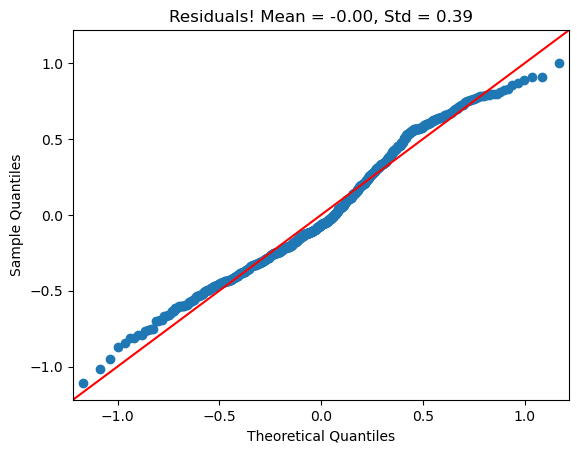

In [ ]:
qqplot(results.resid, loc=results.resid.mean(), scale=results.resid.std(), line='45')
plt.title(f'Residuals! Mean = {results.resid.mean():.2f}, Std = {results.resid.std():.2f}');

The mean of the residuals is zero and they fall pretty neatly along the line, which means the residuals are normally distributed (or at least close enough).

### Homoskedasticity

Homoskedasticity means that the variance, or spread, of the residuals is constant. We can check that with a scatterplot.

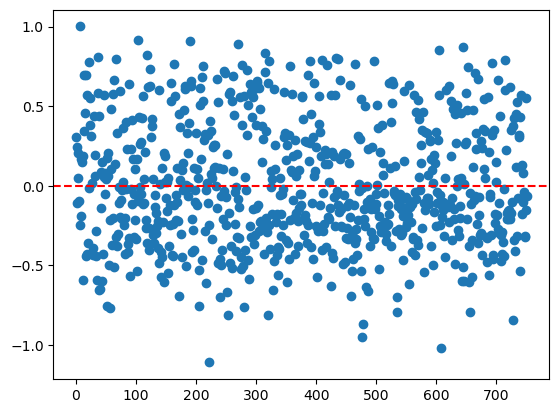

In [ ]:
# scatterplot of residuals
plt.scatter(x=range(len(results.resid)), y=results.resid)
plt.axhline(0, color='red', linestyle='dashed');

The residuals form a solid block centered around zero, between about -1 and +1. It's a pretty good bet that the assumption of homoskedasticity holds.

### Independence of Features

We can check for independence by making a heatmap of the correlations.

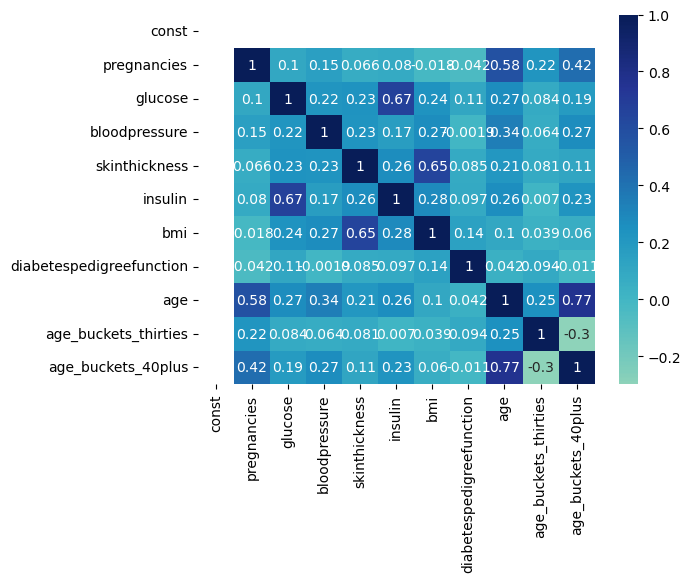

In [ ]:
# heatmap of correlation
sns.heatmap(X.corr(), annot=True, center=0, cmap='YlGnBu');

A bunch of our features are way too highly correlated. If we really want to draw good inference and have scientifically valid results, then we should take some measures to eliminate that correlation. We could use PCA (although that makes the results hard to interpret), or we could drop some features, or we could engineer new features that contain the same information but remove the correlation. It is *most* problematic when the correlation applies to a feature you're specifically interested in. In that case, you really need to remove the correlation for anything the test says to be valid. We're just not going to worry about it.

# Logistic Regression

Our target variable, whether or not a person has been diagnosed with diabetes, only takes two values: 0 and 1, representing No and Yes, or No-Diabetes and Diabetes. There is a special kind of linear regression designed specifically for cases like this! It is called Logistic Regression. It works pretty much the same way, but it can only predict numbers between zero and one. The output of a logistic regression model can be interpreted as the *probability* that a person has diabetes, and a lot of people really like that interpretation. Let's fit a logistic regression model and compare the results to the linear regression above.

In [ ]:
# load Logit function from statsmodels
from statsmodels.discrete.discrete_model import Logit

In [ ]:
# create model
logistic_regression = Logit(y, X)
# fit model
result = logistic_regression.fit()

Optimization terminated successfully.
         Current function value: 0.454745
         Iterations 6


In [ ]:
# look at the results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                  752
Model:                          Logit   Df Residuals:                      741
Method:                           MLE   Df Model:                           10
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:                  0.2983
Time:                        16:59:39   Log-Likelihood:                -341.97
converged:                       True   LL-Null:                       -487.37
Covariance Type:            nonrobust   LLR p-value:                 1.360e-56
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.3538      0.241     -5.611      0.000      -1.827      -0.881
pregnancies                  0.1725      0.116      1.491      0.136      -0.054       0.399
glucose                      1.0484      0.133      7.888      0.000       0.788       1.309
bloodpressure               -0.1492      0.105     -1.416      0.157      -0.356       0.057
skinthickness                0.1077      0.132      0.814      0.416      -0.152       0.367
insulin                      0.0734      0.133      0.553      0.581      -0.187       0.334
bmi                          0.6381      0.139      4.603      0.000       0.366       0.910
diabetespedigreefunction     0.3105      0.099      3.136      0.002       0.116       0.505
age                          0.0071      0.261      0.027      0.978      -0.505       0.519
age_buckets_thirties         0.9125      0.397      2.301      0.021       0.135       1.690
age_buckets_40plus           0.9954      0.569      1.750      0.080      -0.119       2.110
============================================================================================
"""

# Predicting with a Model!

Finally, we get to predict stuff! This is what makes data science and machine learning so powerful: Really good predictions. Linear Regression is probably the "*worst*" model in terms of predictive power, but it still does remarkably well compared to "traditional", qualitative decision-making.

Before we get to predicting, there's one more concept we need.

## Train/Test Split

Before fitting a model, we are going to split our dataset into two groups, called the training set and the testing set.

**Why?**

When we use a machine learning model, we will be using it on data that we haven't seen before and where we don't know what the true answer is. Since we don't know what the true answer is, we can't tell how accurate our model is. BUT! We can get an idea of how accurate the model is by using part of our data to test the model. This testing data needs to be withheld from the model. If the model "sees" the testing data, then it doesn't count as a test any more. Luckily, sci-kit learn makes this easy.

In [ ]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# withhold 20 percent of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# make sure the shapes are correct
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(601, 11)
(601,)
(151, 11)
(151,)


## Fit a Model

In [ ]:
# use Logistic regression
# note how we only fit to the TRAIN data
log_regression = Logit(y_train, X_train)
log_model = log_regression.fit()

Optimization terminated successfully.
         Current function value: 0.468409
         Iterations 6


In [ ]:
# make predictions
y_pred = log_model.predict(X_test)

In [ ]:
# look at predictions
y_pred

692    0.750180
33     0.444309
632    0.464473
432    0.406665
525    0.595859
         ...   
420    0.152304
376    0.426001
507    0.016255
567    0.083251
110    0.612676
Length: 151, dtype: float64

This doesn't look right...the actual values are either ones or zeros, but these are decimals in between. Before we can really see how well the model predicts diabetes, we need to sort these values into ones and zeros. To do that, we can set a threshold where if the prediction is higher than the threshold, we say it's a one and if it is below the threshold we say it is a zero. We can set any threshold we want, and picking the right threshold is an important skill.

## Choose Threshold

In [ ]:
# just to see what happens, let's use 0.5 as the threshold
threshold = 0.5
y_final = (y_pred > threshold) * 1

In [ ]:
# check final predictions
y_final

692    1
33     0
632    0
432    0
525    1
      ..
420    0
376    0
507    0
567    0
110    1
Length: 151, dtype: int32

# Model Metrics

## Accuracy

There are a few metrics we might be interested in. The most obvious one is accuracy. The model's accuracy is how many of the predictions are correct. It's an easy calculation in Python. There's also a sci-kit learn implementation if we want.

In [ ]:
# accuracy
print(f'Model Accuracy: {(y_final == y_test).mean():.2f}')

Model Accuracy: 0.77


One of the tricky things is that sometimes your model can get a really high accuracy just by predicting the same value every time. So we want to check and make sure that's not what is happening here by looking at the value count in both the test data and the predictions.

In [ ]:
# value_counts for predictions
y_final.value_counts()

0    107
1     44
Name: count, dtype: int64

In [ ]:
# value_counts for test data
y_test.value_counts()

outcome
0.0    103
1.0     48
Name: count, dtype: int64

Those are pretty similar, which is very encouraging. It looks like our model is legitimately getting 77% of predictions correct!

### Sci-kit Learn

In [ ]:
# import from sklearn
from sklearn.metrics import accuracy_score

In [ ]:
# get the accuracy score
accuracy_score(y_final, y_test)

0.7748344370860927

## Precision

**Precision** answers the question, "How many of the predicted positives are true?" In our case, how many of the people that we predicted have diabetes have actually been diagnosed with diabetes? It is a good metric when there are big drawbacks to predicting the positive and getting it wrong. For example, say you're predicting which leads to target in a sales campaign. In that case, guessing that someone is a good lead and being wrong wastes the salesperson's time, and we don't want that. In that case, you might want to aim for higher **Precision**. Sci-kit learn makes it easy.

In [ ]:
# import from sklearn
from sklearn.metrics import precision_score

In [ ]:
# calculate precision
precision_score(y_final, y_test)

0.6041666666666666

## Recall

**Recall** answers the question, "How many of the true positives are we catching?" In our case, how many of the people with diabetes are identified by our model? This is a good metric when missing true positive is a big problem. For example, predicting whether a person has cancer. In that scenario, you really want to catch EVERY person who has cancer, because if you don't then they will die. You'd want to improve **Recall** to do that. Sci-kit learn makes it easy!

In [ ]:
# from sklearn
from sklearn.metrics import recall_score

In [ ]:
# calculate recall
recall_score(y_final, y_test)

0.6590909090909091

## Confusion Matrix

A **confusion matrix** lets you see where your errors are happening. It can be useful for identifying problems with the model. Let's look at one and then we'll talk about how to read it.

In [ ]:
# import from sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

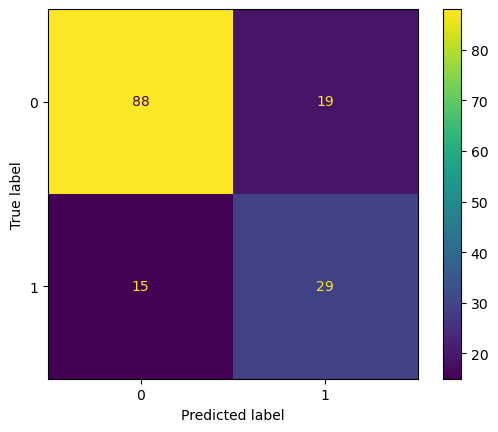

In [ ]:
# show confusion matrix
confmat = confusion_matrix(y_final, y_test)
disp = ConfusionMatrixDisplay(confmat)
disp.plot();

This confusion matrix tells us that we accurately identified 88 people who did not have diabetes and 29 people who did have diabetes. We incorrectly predicted that 19 people have diabetes when they didn't, and we inaccurately predicted that 15 people didn't have diabetes but they did. What I look for most in these is that the boxes on the diagonals have higher numbers than the other boxes and that the errors (off the diagonal) are pretty evenly distributed. Both of these things are true here, and it looks like this model is fitting pretty well!

# Classification Report

A **classification report**, from sci-kit learn, just gives you a bunch of information all at once.

In [ ]:
# import from sklearn
from sklearn.metrics import classification_report

In [ ]:
# classification report
print(classification_report(y_final, y_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.60      0.66      0.63        44

    accuracy                           0.77       151
   macro avg       0.73      0.74      0.73       151
weighted avg       0.78      0.77      0.78       151



# Choosing the Best Threshold for Accuracy

In [ ]:
possible_thresholds = np.arange(1,100) / 100
possible_thresholds

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [ ]:
best_threshold = 0
best_accuracy = 0
best_y = y_pred
accuracies = []
for t in possible_thresholds:
    y_temp = (y_pred > t)*1
    accuracy_temp = accuracy_score(y_temp, y_test)
    if accuracy_temp > best_accuracy:
        best_accuracy = accuracy_temp
        best_threshold = t
        best_y = y_temp
    accuracies.append(accuracy_temp)

In [ ]:
print(f'To maximize the accuracy, the best threshold is {best_threshold:.2f}')
print(f'The best accuracy we could get is {best_accuracy:.4f}')

To maximize the accuracy, the best threshold is 0.71
The best accuracy we could get is 0.8146


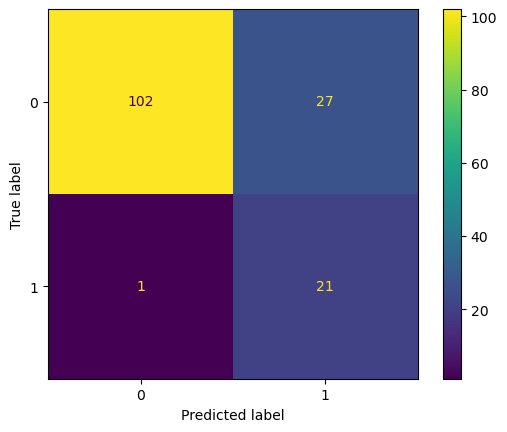

In [ ]:
confmat = confusion_matrix(best_y, y_test)
disp = ConfusionMatrixDisplay(confmat)
disp.plot();

In [ ]:
print(f'Precision: {precision_score(best_y, y_test):.2f}')
print(f'Recall: {recall_score(best_y, y_test):.2f}')

Precision: 0.44
Recall: 0.95


In [ ]:
print(classification_report(best_y, y_test))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       129
           1       0.44      0.95      0.60        22

    accuracy                           0.81       151
   macro avg       0.71      0.87      0.74       151
weighted avg       0.91      0.81      0.84       151



Wow! Just by changing the threshold, we have significantly improved the **accuracy** and **recall** of the model, though **precision** is lower than the original.

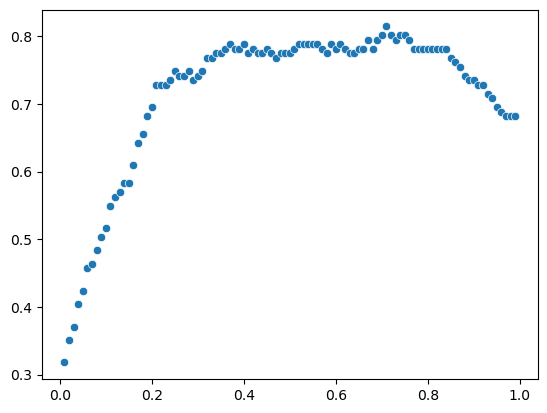

In [ ]:
sns.scatterplot(x=possible_thresholds, y=accuracies);